In [13]:
import numpy as np
import array
import sys
import matplotlib.pyplot as plt

import pylab as pl

In [147]:
project='Lin_Strat'

In [148]:
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32

Ho=600  # ocean depth in meters
nx=20    # number of gridpoints in x-direction
ny=100    # number of gridpoints in y-direction
nz=20     # number of gridpoints in z-direction
nt=10  #for 3 years with timestep 60 s

x=np.arange(0,nx*5,5)
y=np.arange(0,ny*5,5)
z=np.

In [149]:
params = {'font.size': 8,
          'figure.figsize': (5, 3),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [150]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

mu=0
sig=60

Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,:,1]=np.flip(-14000*gaussian(y, mu, sig))


In [151]:
ho=-Ho*np.ones((nx,ny),dtype=dtype)
ho[0,:]=0
ho[-1,:]=0
ho[:,-1]=0

In [187]:
arrZ=np.array((5,5,5,8,8,10,10,10,12,12,15,15,15,20,40,50,60,100,100,100))
print(sum(arrZ))
print(len(arrZ))
z=np.cumsum(arrZ)

600
20


In [201]:
Temp=np.zeros((nx,ny,nz), dtype=dtype)
m=0.02
T=15 - m*z
Temp[:,:]=T

### Intent with Z being equally spaced, Heatflux just a block

In [40]:
ho=-Ho*np.ones((nx,ny),dtype=dtype)
ho[0,:]=0
ho[-1,:]=0
ho[:,-1]=0

In [ ]:
Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,70:90,1]=-80

In [44]:
strat=np.ones(ny)*15

# Plotting

In [48]:
params = {'font.size': 8,
          'figure.figsize': (10, 5),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

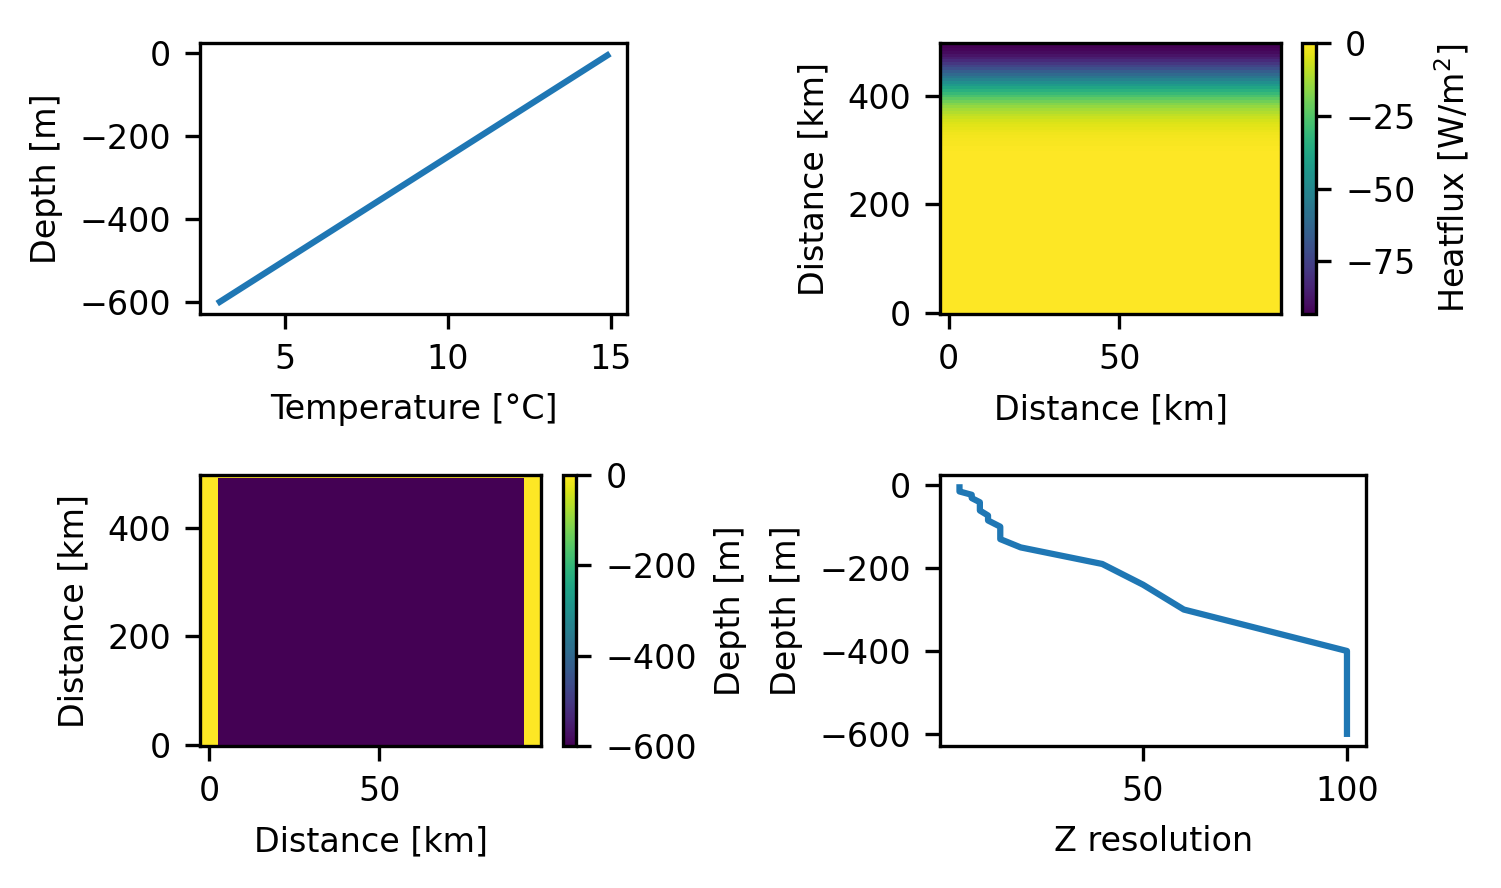

In [208]:
fig,ax=plt.subplots(2,2)

ax[0,0].plot(Temp[10,10,:],-z )
ax[0,0].set(xlabel='Temperature [°C]',ylabel='Depth [m]')

cax=ax[0,1].pcolormesh(x,y,Q[:,:,1].T)
cbar= plt.colorbar(cax)
cbar.set_label('Heatflux [W/m$^2$]')
ax[0,1].set(xlabel='Distance [km]',ylabel='Distance [km]')

cax=ax[1,0].pcolormesh(x,y,ho.T)
cbar= plt.colorbar(cax)
cbar.set_label('Depth [m]')
ax[1,0].set(xlabel='Distance [km]',ylabel='Distance [km]')


ax[1,1].plot(arrZ, -z )
ax[1,1].set(xlabel='Z resolution',ylabel='Depth [m]')


fig.tight_layout()
fig.patch.set_alpha(0.0)
plt.savefig('../Figures/' + str(project) + '/InputVars.png', bbox_inches='tight')


# Save the file

In [145]:
f = open('../input/' + str(project) + '/Qnet.bin','wb')
write_with_byte_inversion(f, Q)
f.close()

In [146]:
f = open('../input/' + str(project) + '/bathy.bin','wb')
write_with_byte_inversion(f, ho)
f.close()

In [ ]:
f = open('../input/' + str(project) + '/tempinit.bin','wb')
write_with_byte_inversion(f, temp)
f.close()